# Session 2: Computational Performance

### OBJECTIVE: Submit a performance analysis of a self-implemented physics textbook function or constant using Julia benchmarking tools.

#### KR1: Implemented (customized) at least one math/physics textbook function, or constant (prefer those that involve a sum or a loop) in Julia. Discuss its importance in Physics. 

For this exercise, I chose to implement the Runge-Kutta method, specifically the most popular one that computes it up to the fourth-order or "RK4". 

The RK methods are improvements over the Euler method (technically Euler is the first-order RK method) for solving differential equations numerically. 

RK4 is important in Physics since ODEs that cannot be solved analytically are commonplace across the field. The simplicity of RK4 makes it the "workhorse" or the first method most physicists turn to to solve ODEs due to it offering the best balance between accuracy and simplicity to program [2].

Given an initial value problem specified as

$\frac{dy}{dt} = f(t,y),$

$y(t_{o}) = y_{o}$ 

and a step-size $h > 0$. Note that for my function I just defaulted to 

$ h = t_{n+1} - t{n} $  given a user input of a time range.

We solve:

$ y_{n+1} = y_{n} + \frac{1}{6}h(k_{1} + 2k_{2} +2k_{3} + k_{4}$

$ t_{n+1} = t_{n} + h $

For $n = 0, 1, 2, 3, ... $, using

$ k_{1} = f(t_{n},y_{n}) $

$ k_{2} = f(t_{n} + \frac{h}{2},y_{n} + h\frac{k_{1}}{2}) $

$ k_{3} = f(t_{n} + \frac{h}{2},y_{n} + h\frac{k_{2}}{2}) $

$ k_{4} = f(t_{n} + h,y_{n} + hk_{3}) $



Importing my rk4 method and also showing the source code and docs:

In [1]:
include("my_rk4.jl")

rk4

In [2]:
?rk4

search: rk4



```
    rk4(f, t, y₀)
```

My implementation of Fourth order Runge-Kutta method (RK4)

Arguments:         f (function): function to be evaluated         t (Vector{Float64}): time of values to evaluate         y₀ (Float64): inital value 


In [3]:
;cat my_rk4.jl

"""
        rk4(f, t, y₀)
My implementation of Fourth order Runge-Kutta method (RK4)

Arguments:
        f (function): function to be evaluated
        t (Vector{Float64}): time of values to evaluate
        y₀ (Float64): inital value 

"""
function rk4(f, t, y₀)
    n = length(t)
    y = zeros(n)
    y[1] = y₀
    for i in 1:n-1
        h = t[i+1] - t[i]
        k₁ = f(y[i], t[i])
        k₂ = f(y[i] + k₁*h/2, t[i] + h/2)
        k₃ = f(y[i] + k₂*h/2, t[i] + h/2)
        k₄ = f(y[i] + k₃*h, t[i] + h)
        y[i+1] = y[i] + (h/6)*(k₁ + 2k₂ + 2k₃ + k₄)
    end
    return y
end



I chose to import it instead of defining it here in the notebook because I was originally just testing it in the Julia REPL.

I'm testing my implementation with the test function in Newman [2] Example 8.1 where we solve for
    
$ \frac{dy}{dt} = -y^{3} + \sin{t}$ (Eq. 8.7)

in Julia, let's make this as:

In [4]:
f(y, t) = -y^3 + sin(t)

f (generic function with 1 method)

We solve this from t = 0 to t = 10 with 10_000 steps

In [5]:
y₀ = 0.0

t₀ = 0.0
tₙ = 10.0
num = 60
t = LinRange(t₀, tₙ, num)

60-element LinRange{Float64}:
 0.0,0.169492,0.338983,0.508475,…,9.32203,9.49153,9.66102,9.83051,10.0

In [6]:
y = rk4(f,t,y₀)

60-element Vector{Float64}:
 0.0
 0.014329235424747944
 0.05689741093124896
 0.12636193109064275
 0.22008186710230448
 0.33335031386920744
 0.458538983195618
 0.5850491751365795
 0.7010675336490447
 0.7968457933214628
 0.8673818292603139
 0.9125917562935169
 0.9354078434925187
 ⋮
 0.6451938137106064
 0.7452591148151025
 0.8100556602078488
 0.8424231390365186
 0.8478920173069657
 0.8319380923080212
 0.7987414102174337
 0.7510125102177932
 0.6902390332899954
 0.6169889529139572
 0.5311535456541011
 0.43213892947627713

Here we show what the result of using our RK4 function is.

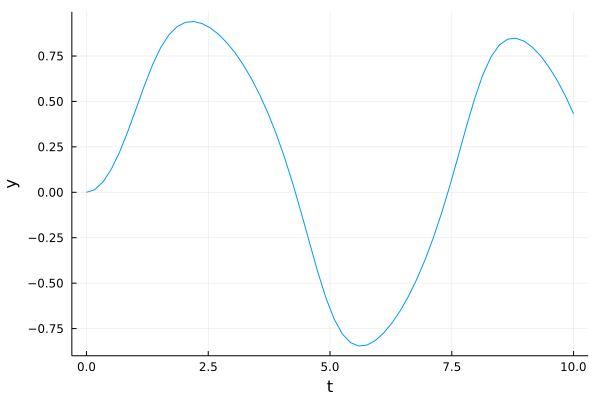

In [7]:
using Plots
plot(t, y, label=nothing, xlabel='t', ylabel='y')

#### KR2: Compare the performance (accuracy) of the implemented function in comparison with the existing special functions within Julia (or a reliable module)

We want to compare our ODE solution to that using Julia's `DifferentialEquations.jl` package. There are some things that we have to change however such as our function to be analyzed should be in the form `f(y, p, t)` and not just `f(y, t)` and the time is a tuple of the starting and end points and not an aray.

In [8]:
tspan = (0.0, 10.0)

(0.0, 10.0)

In [9]:
f_(y, p, t) = -y^3 + sin(t)

f_ (generic function with 1 method)

We want to show that the results of our RK4 implementation are the same using this package (see https://diffeq.sciml.ai/stable/tutorials/ode_example/ as a refence for usage of this package).

In [10]:
using DifferentialEquations
my_f(y, t) = -y^3 + sin(t)
prob = ODEProblem(f_, y₀, tspan)
sol_rk4 = solve(prob, RK4());

sol_rk4 has two components: `sol_rk4.t` which is the time array and `sol_rk4.u` which is the "solution" array

Plotting the results of our created function with this one, we see that there is practically no difference:

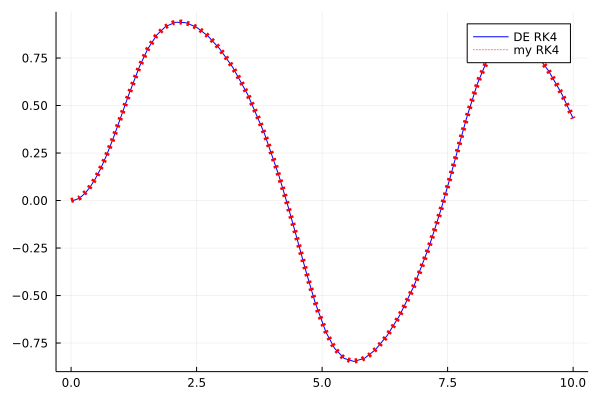

In [11]:
plot(sol_rk4.t, sol_rk4.u, color="blue", label="DE RK4")
plot!(t, y, color="red",  linestyle=:dot, linewidth=5, label="my RK4")

#### KR3: Successful loading of the `BenchmarkTools` module. May need to add it first via the `Pkg` or REPL package mode.


We can see if a package is installed using `Pkg.installed()` although it is now depracated.

In [12]:
using Pkg
haskey(Pkg.installed(), "BenchmarkTools")

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Pkg.jl:566


true

In [13]:
using BenchmarkTools

#### KR4: Itemized differences between `@time`, `@btime`, `@benchmark` and other `@time`-like macros. Nice if the situations when they are best applied are mentioned.


Let's start with `@time` which we've used in the previous session. It gets the time to run a statement or function. 

In [14]:
@time rk4(f,t,y₀);

  0.000027 seconds (1 allocation: 576 bytes)


`@timev` is more verbose

In [15]:
@timev rk4(f,t,y₀);

  0.000013 seconds (1 allocation: 576 bytes)
elapsed time (ns): 12835
bytes allocated:   576
pool allocs:       1


`@benchmark` is more stochastic. It doesn't just execute the code once but multiple times so we get a distribution of the runtimes.

In [17]:
@benchmark rk4(f,t,y₀)

BenchmarkTools.Trial: 10000 samples with 8 evaluations.
 Range (min … max):  3.643 μs … 51.748 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.967 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   4.295 μs ±  1.332 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▅ █▅▁          ▁    ▁▁▁▂▃▂▂▁                              ▁
  ██▇████▅▆▅▆▆▇▇████▆▇█████████▇▇▆▅▄▅▄▄▃▄▄▄▄▂▆▄▅▄▄▄▅▅▅▄▅▂▃▄▅ █
  3.64 μs      Histogram: log(frequency) by time     9.49 μs <

 Memory estimate: 576 bytes, allocs estimate: 1.

`@btime` where I assume b stands for benchmark has output similar to @time but is also stochastic like @benchmark in the sense that it runs the statement multiple times. Unlike @benchmark though it only returns the minimum.

In [16]:
@btime rk4(f,t,y₀);

  3.618 μs (1 allocation: 576 bytes)


So when should you use each one? In general to truly benchmark things @benchmark or @btime are our go-tos. However, if we encounter something that will take too long that we just want to time maybe once, @time would be preferred since using @benchmark or @btime will no longer be efficient.

If we want to see more specific insights using other @time macros such as @timev would be useful and if we want to assign it as a variable or save it @elapsed.

If we are just concerned with the minimum time and we can afford to run it multiple times to have a good benchmark, @btime works but in cases where the distribution of the run-time is not flat (possibly bimodal) then looking at the results of @benchmarks would be more useful.

#### KR5: Identified demonstrated useful features within the `Profiler` module of Julia. Features must be explained why useful for your case.


In [18]:
using Profile

I tried to profile just one call of the my rk4 function and it turned out to not be useful since it's mostly the overhead and base calls for booting /loading /running the program etc that are taking time once I print the profiling output.

In [19]:
@profile rk4(f,t,y₀);

In [20]:
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
 ╎3 @Base/task.jl:411; (::IJulia.var"#15#18")()
 ╎ 3 @IJulia/src/eventloop.jl:8; eventloop(socket::ZMQ.Socket)
 ╎  3 @Base/essentials.jl:706; invokelatest
 ╎   3 @Base/essentials.jl:708; #invokelatest#2
 ╎    3 ...rc/execute_request.jl:67; execute_request(socket::ZMQ.Socke...
 ╎     3 ...c/SoftGlobalScope.jl:65; softscope_include_string(m::Modu...
 ╎    ╎ 3 @Base/loading.jl:1094; include_string(mapexpr::typeof...
2╎    ╎  3 @Base/boot.jl:360; eval
Total snapshots: 4


By running the same function multiple times (in this case 5000), we are able to have a more useful output.

In [21]:
@profile (for i = 1:5000; rk4(f,t,y₀); end);

Although the profiling output being nested is useful, at times when there are too many dependencies, a lot of info is just cut off.

In [22]:
Profile.print()

Overhead ╎ [+additional indent] Count File:Line; Function
 ╎17 @Base/task.jl:411; (::IJulia.var"#15#18")()
 ╎ 17 @IJulia/src/eventloop.jl:8; eventloop(socket::ZMQ.Socket)
 ╎  17 @Base/essentials.jl:706; invokelatest
 ╎   17 @Base/essentials.jl:708; #invokelatest#2
 ╎    17 ...c/execute_request.jl:67; execute_request(socket::ZMQ.Sock...
 ╎     17 ...c/SoftGlobalScope.jl:65; softscope_include_string(m::Mod...
 ╎    ╎ 17 @Base/loading.jl:1094; include_string(mapexpr::typeof...
2╎    ╎  17 @Base/boot.jl:360; eval
 ╎    ╎   14 ...file/src/Profile.jl:28; top-level scope
 ╎    ╎    14 In[21]:1; macro expansion
1╎    ╎     1  @Base/array.jl:0; rk4(f::typeof(f), t::LinRang...
1╎    ╎     1  ...ession-2/my_rk4.jl:0; rk4(f::typeof(f), t::LinRang...
 ╎    ╎     3  ...ession-2/my_rk4.jl:18; rk4(f::typeof(f), t::LinRang...
 ╎    ╎    ╎ 2  In[4]:1; f
 ╎    ╎    ╎  2  ...e/special/trig.jl:41; sin(x::Float64)
1╎    ╎    ╎   1  @Base/float.jl:0; rem_pio2_kernel
1╎    ╎    ╎   1  ...ecial/rem_pio2.jl:0; 

Printing it in flat format makes it a bit more readable at the expense of losing the nested structure.

In [23]:
Profile.print(format=:flat)

 Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
    14         0 In[21]                     1 macro expansion
     9         0 In[4]                      1 f
     1         1 @Base/array.jl             ? rk4(f::typeof(f), t::LinRange{F...
    17         3 @Base/boot.jl            360 eval
    17         0 @Base/essentials.jl      708 #invokelatest#2
    17         0 @Base/essentials.jl      706 invokelatest
     2         2 @Base/float.jl           332 *
     3         3 @Base/float.jl           326 +
     1         1 @Base/float.jl           329 -
     1         1 @Base/float.jl           335 /
     1         1 @Base/float.jl           339 muladd
     1         1 @Base/float.jl             ? rem_pio2_kernel
    17         0 @Base/loading.jl        1094 include_string(mapexpr::typeof(...
     1         0 @Base/math.jl            131 evalpoly
     1         0 @Base/math.jl            132 macro expansion
     1         0 @Base

Another option available is to use the ProfileView which outputs a graph that displays something like this https://github.com/timholy/ProfileView.jl/blob/master/readme_images/pv1.png

I can't seem to find a way to output the graph here in the notebook and the most essential part of it where if you hover you get the names of each function call will not be reflected in just an image.

However, it can still be useful if you want a visual way of profiling where you can see function call stacks and runtimes (how long each element is along the x-axis).

In terms of colors in the graph, different colors are meant to delineate between different lines and it seems that red is the one we should mostly look at based on the package repo readme:
```
It is also worth noting that red is (by default) a special color: it is reserved for function calls that have to be 
resolved at run-time. Because run-time dispatch (aka, dynamic dispatch, run-time method lookup, or a virtual call) often has a significant impact on performance, ProfileView highlights the problematic call in red. It's worth noting that some red is unavoidable; for example, the REPL can't predict in advance the return types from what users type at the prompt, and so the bottom eval call is red. Red bars are problematic only when they account for a sizable fraction of the top of a call stack, as only in such cases are they likely to be the source of a significant performance bottleneck. 
```

In [24]:
using ProfileView
ProfileView.view()

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=1, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint

#### KR6: A discussion of the performance of the implemented function above.

As mentioned most of the runtime goes into base Julia elements. However, for this discussion I want to focus on the lines mostly relevant for our rk4 function:
```
Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
     3         0 ...session-2/my_rk4.jl    18 rk4(f::typeof(f), t::LinRange{F...
     3         0 ...session-2/my_rk4.jl    19 rk4(f::typeof(f), t::LinRange{F...
     4         0 ...session-2/my_rk4.jl    20 rk4(f::typeof(f), t::LinRange{F...
     2         0 ...session-2/my_rk4.jl    21 rk4(f::typeof(f), t::LinRange{F...
```

These are the only ones calling our function that has some significant impact on performance. What is notable here is that they are from lines 18-21.

In [31]:
;sed -n 18,21p my_rk4.jl

        k₂ = f(y[i] + k₁*h/2, t[i] + h/2)
        k₃ = f(y[i] + k₂*h/2, t[i] + h/2)
        k₄ = f(y[i] + k₃*h, t[i] + h)
        y[i+1] = y[i] + (h/6)*(k₁ + 2k₂ + 2k₃ + k₄)


We see that if there's a bottleneck in our code, which in this case it really isn't but just has the most execution time, it's when we are computing for the RK equations. 

Specifically, these are the ones that call on our function `f`. I think we can assume that if `f` is a more computationally intensive function, it will show up more as the bottleneck. The last line where the function is not evaluated has the least execution time (which makes sense this it's mostly just arithmetic operations).

One weird thing that I am unable to reliably replicate though is that the line for generating a list of zeros
```Julia
y = zeros(n)
```
Sometimes shows up in the profiling with considerable execution time (more than the mentioned lines).

But essentially, based on our profiling, if there's anything we can improve on, it's optimizing how we compute for the k1-4 coefficients, which is primarily dependent on the function being evaluated/solved.

# References
[1] https://en.wikipedia.org/wiki/Runge–Kutta_methods

[2] Computational Physics by Mark Newman